# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url).json()

In [ ]:
# Fetch current ETH price
response_eth_data = requests.get(eth_url).json()

In [7]:
# Compute current value of my crpto
#current value of btc
current_btc_value = response_btc_data['data']['1']['quotes']['USD']['price']
current_btc_value

47120.0

In [8]:
# Compute current value of my crpto
#current value of eth
current_eth_value = response_eth_data['data']['1027']['quotes']['USD']['price']
current_eth_value

3793.15

In [9]:
#current value of the crypto assets
crypto_assets = current_btc_value + current_eth_value
crypto_assets

50913.15

In [10]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${current_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${current_eth_value:0.2f}")

The current value of your 1.2 BTC is $47120.00
The current value of your 5.3 ETH is $3793.15


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

shares_data = {"shares": [200, 50]}

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

type(alpaca_api_key)
type(alpaca_secret_key)

str

In [13]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2021-08-12", tz="America/New_York").isoformat()

In [15]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [16]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [17]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                             open      high    low   close   volume    open   
time                                                                          
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4  115.54  4248390  443.62   

                                                               
                               high     low   close    volume  
time                                                           
2021-08-12 00:00:00-04:00  445.2572  442.66  445.08  34892086

In [18]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.54
Current SPY closing price: $445.08


In [19]:
# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

shares
AGG     200
SPY      50

In [20]:
# Compute the current value of shares
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22254.00
The current value of your 200 AGG shares is $23108.00


### Savings Health Analysis

In [21]:
# Set monthly household income
monthly_income = 1200

In [22]:
# Consolidate financial assets data
financial_assets = my_spy_value + my_agg_value + monthly_income + crypto_assets
financial_assets

97475.15

In [26]:
# Create savings DataFrame
crypto_assets = current_btc_value + current_eth_value
shares_assets = my_agg_value + my_spy_value
data = {'amount':[crypto_assets,shares_assets]} 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

amount
crypto  50913.15
shares  45362.00

<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

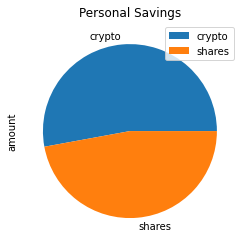

In [24]:
# Plot savings pie chart
df_savings.plot.pie(y=0, title = "Personal Savings")

In [29]:
df_savings

amount
crypto  50913.15
shares  45362.00

In [28]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("You have enough money for an emergency")
elif total_savings < emergency_fund:
    print(f"You are $ {emergency_fund - total_savings} behind from reaching your three times monthly income")
else:
    print("Good Work! you have reached youur goal of savings")

You have enough money for an emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [37]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()

In [43]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-01-11 00:00:00-05:00  108.53  108.93  108.420  108.585  3714128.0   
2017-01-12 00:00:00-05:00  108.78  108.90  108.610  108.620  2876232.0   
2017-01-13 00:00:00-05:00  108.50  108.55  108.261  108.440  3083926.0   
2017-01-17 00:00:00-05:00  108.81  108.87  108.650  108.790  3253649.0   
2017-01-18 00:00:00-05:00  108.60  108.67  108.235  108.315  2873994.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2017-01-11 00:00:00-05:00     NaN     NaN      NaN     NaN         NaN  
2017-01-12 00:00:00-05:00  226.50  226.75  224.955  226.57  59431700.0  
2017-01-13 00:00:00-05:00  226.73  227.40  226.690  227.03  42877069.0  
2017-01-17 00:00:00-05:00  226.31  226.78  225.800  226.29  44347527.0  
2017-01-18 00:00:00-05:00  226.54  226.80  225.900  226.74  42486413.0

In [44]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [45]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2017-01-11 00:00:00-05:00  108.53  108.93  108.420  108.585  3714128.0   
2017-01-12 00:00:00-05:00  108.78  108.90  108.610  108.620  2876232.0   
2017-01-13 00:00:00-05:00  108.50  108.55  108.261  108.440  3083926.0   
2017-01-17 00:00:00-05:00  108.81  108.87  108.650  108.790  3253649.0   
2017-01-18 00:00:00-05:00  108.60  108.67  108.235  108.315  2873994.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-01-11 00:00:00-05:00          NaN     NaN     NaN      NaN     NaN   
2017-01-12 00:00:00-05:00     0.000322  226.50  226.75  224.955  226.57   
2017-01-13 00:00:00-05:00    -0.001657  226.73  227.40  226.690  227.03   
2017-01-17 00:00:00-05:00     0.003228  226.31  226.78  225.800  226.29   
2017-01-18 00:00:00-05:00    -0.004366  226.54  226.80  225.900  226.74   

                                                    
                               volume daily_return  
time                                                
2017-01-11 00:00:00-05:00         NaN          NaN  
2017-01-12 00:00:00-05:00  59431700.0          NaN  
2017-01-13 00:00:00-05:00  42877069.0     0.002030  
2017-01-17 00:00:00-05:00  44347527.0    -0.003259  
2017-01-18 00:00:00-05:00  42486413.0     0.001989

In [46]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Maaz\Desktop\Github_hira\UTOR-VIRT-FIN-PT-11-2021-U-C\05-APIs\Unit 5 Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.004811   0.993823   1.004355   0.991932   1.002260   1.007219   
2      1.001783   0.998211   1.016227   0.986406   0.997263   1.011042   
3      1.000841   0.995835   1.013994   0.985646   0.997439   1.030492   
4      1.009953   0.991043   1.001740   0.985704   0.998649   1.024061   
...         ...        ...        ...        ...        ...        ...   
7556  13.477803  26.750341  29.652291  11.995727  46.466696  19.976439   
7557  13.532290  26.845892  29.828817  11.969693  47.038712  20.058298   
7558  13.567391  26.387618  29.738684  11.955474  47.345107  20.059896   
7559  13.430131  26.385690  29.724690  11.914692  47.590723  20.012554   
7560  13.408023  26.049714  29.733643  12.039475  47.335296  19.628189   

            6          7         8          9    ...       490       491  \
0      1.000000   1.000000  1.000000   1.000000  ...  1.000000  1.000000   
1      0.995465   1.006434  1.001021   0.998712  ...  0.996757  1.006312   
2      0.982207   1.015318  1.000870   1.007579  ...  1.010885  1.013321   
3      0.980242   1.001576  1.008973   1.020624  ...  1.014382  1.021329   
4      0.985383   1.003058  1.014078   1.020983  ...  1.031224  1.012658   
...         ...        ...       ...        ...  ...       ...       ...   
7556  22.751228  15.250100  9.018409  11.461566  ...  8.924471  6.408627   
7557  22.990888  15.144150  9.098467  11.456101  ...  9.053186  6.333751   
7558  22.892620  15.231583  9.177817  11.574404  ...  9.058229  6.274547   
7559  23.235276  15.391315  9.221225  11.514106  ...  9.023978  6.302989   
7560  23.278357  15.446390  9.233091  11.537621  ...  9.019527  6.298966   

           492        493       494        495        496       497  \
0     1.000000   1.000000  1.000000   1.000000   1.000000  1.000000   
1     1.018708   1.004441  1.006359   1.007041   0.989806  1.010046   
2     1.024722   0.998337  1.003638   1.014925   1.009462  1.002595   
3     1.030048   1.000661  1.000351   1.007867   1.009065  1.008100   
4     1.026001   0.999038  0.998203   1.001194   1.011552  0.993988   
...        ...        ...       ...        ...        ...       ...   
7556  4.050721  10.640319  6.547850  23.072482  18.075814  7.238604   
7557  4.057821  10.781870  6.548789  22.978017  18.309217  7.231962   
7558  4.024116  10.770075  6.566344  22.828160  18.182452  7.296211   
7559  3.992142  10.915301  6.565314  22.977685  18.036470  7.235561   
7560  3.957218  10.852238  6.617789  23.160848  18.102041  7.360150   

            498        499  
0      1.000000   1.000000  
1      1.010788   1.011073  
2      1.012037   1.012604  
3      1.023521   1.002385  
4      1.027392   0.993144  
...         ...        ...  
7556  47.034500  11.212738  
7557  46.690069  11.366545  
7558  46.778980  11.365928  
7559  46.774850  11.383402  
7560  46.604968  11.439768  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

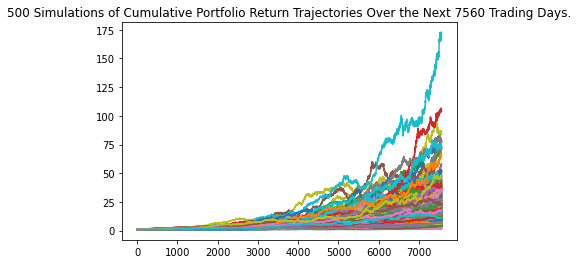

In [47]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation() 
line_plot

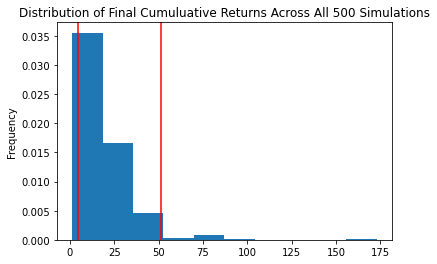

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_retirement = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_retirement)

count           500.000000
mean             18.980234
std              15.230822
min               1.282213
25%               9.229333
50%              14.725336
75%              24.191369
max             172.847536
95% CI Lower      4.338889
95% CI Upper     51.274412
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [50]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(summary_retirement[8]*initial_investment,2)
even_ci_upper = round(summary_retirement[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86777.78 and $1025488.24


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [51]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower = round(summary_retirement[8]*initial_investment,2)
even_ci_upper = round(summary_retirement[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130166.68 and $1538232.35


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")